In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import ppscore as pps
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics
import statsmodels.api as sm

warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv("../data/feature_engineered_training_data.csv", 
                    index_col = [0])

temporal = [var for var in train.columns if ("Yr" in var) 
        or ("Mo" in var) or ("Year" in var)]

levels = ["OverallCond", "OverallQual", "MSSubClass", "BsmtFullBath", 
            "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", 
            "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars",
            "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", 
            "BsmtExposure", "HeatingQC", "KitchenQual", 
          "GarageQual","GarageCond"]

categorical = [var for var in train.columns if (train[var].dtype =='O') 
               and (var not in temporal)
              and (var not in levels)]

numerical = [var for var in train.columns if (train[var].dtype !='O') 
             and (var not in temporal) 
             and (var not in levels)]

numerical_level = levels + numerical

## Feature Engineered (Basic) Performance

#### i). Basic Regression

In [3]:
X = train.drop(["SalePrice", "log_SalePrice"], axis = 1)
y = train["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=100)
LR = LinearRegression().fit(X_train, y_train)
print("RMSE: {}".format(
    np.sqrt(sklearn.metrics.mean_squared_error((LR.predict(X_test)), 
                                               (y_test)))))
print("Unadjusted R2-Score: {}".format(
    sklearn.metrics.r2_score((LR.predict(X_test)), 
                             (y_test))))

RMSE: 84716.80413721436
Unadjusted R2-Score: 0.39389761193823136


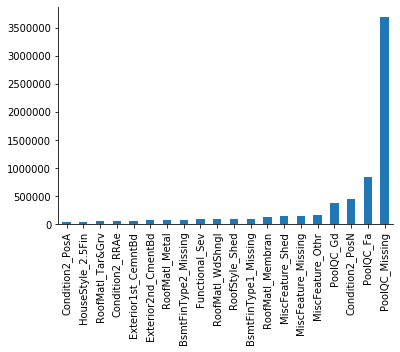

In [4]:
np.abs(pd.Series(LR.coef_, index = X_test.columns)).sort_values().tail(20).plot(kind = "bar")
sns.despine()

#### ii). Log-level Regression model

In [9]:
X = train.drop(["SalePrice", "log_SalePrice"], axis = 1)
y = train["log_SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=100)
LR = LinearRegression().fit(X_train, y_train)
print("RMSE: {}".format(
    np.sqrt(sklearn.metrics.mean_squared_error(np.exp(LR.predict(X_test)), 
                                               np.exp(y_test)))))
print("\nUnadjusted R2-Score: {}".format(
    sklearn.metrics.r2_score(np.exp(LR.predict(X_test)), 
                             np.exp(y_test))))

RMSE: 32636.622045246597

Unadjusted R2-Score: 0.8232339638665236


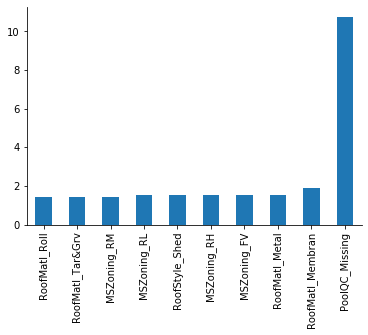

In [18]:
pd.Series(np.exp(LR.coef_), 
          index = X_test.columns).sort_values().tail(10).plot(kind = "bar")
sns.despine()

As we can see, our regression is performing quite well using the log-level model with an adjusted R squared of .82, however, the coefficient is being weighted heavily towards having a pool as the main predictor. However in a real-world scenario this would not make any sense as we cannot determine a house price just by their pool quality. Pool Quality might be an issue in terms on how most of the people does not have any pool, but once they do, the price of the house will have different distribution to those who dont. 